In [71]:
# Car MPG Dataset Analysis & Regression Modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [75]:
file_path = "/Users/gulizkonca/Downloads/auto-mpg.csv"

df = pd.read_csv(file_path)

if "model-year" in df.columns:
    df.rename(columns={"model-year": "model_year"}, inplace=True)

print("First five rows of the raw dataset:")
print(df.head(), "\n")

n_rows, n_cols = df.shape
print(f"The dataset has {n_rows} rows and {n_cols} columns.")
print("Target (dependent) variable: 'mpg'")
print("Columns in the dataset:", list(df.columns), "\n")

First five rows of the raw dataset:
    mpg  cylinders  displacement  horsepower  weight  acceleration  model_year
0  18.0          8         307.0       130.0    3504          12.0          70
1  15.0          8         350.0       165.0    3693          11.5          70
2  18.0          8         318.0       150.0    3436          11.0          70
3  16.0          8         304.0       150.0    3433          12.0          70
4  17.0          8         302.0       140.0    3449          10.5          70 

The dataset has 398 rows and 7 columns.
Target (dependent) variable: 'mpg'
Columns in the dataset: ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year'] 



In [77]:
# 4. Missing Value Analysis and Imputation (Horsepower Example)
# 4a. The 'horsepower' column may contain non-numeric entries (e.g., '?'); convert them to NaN
print("Unique values in 'horsepower' (first 10, checking for non-numeric entries):")
print(df["horsepower"].unique()[:10], "...", "\n")

# 4b. Convert 'horsepower' to numeric, coercing errors into NaN
df["horsepower"] = pd.to_numeric(df["horsepower"], errors="coerce")

# 4c. Check how many missing values exist in each column before imputation
print("Missing values per column before imputation:")
print(df.isnull().sum(), "\n")

# 4d. Impute missing 'horsepower' values using the column median
median_hp = df["horsepower"].median()
print(f"Median horsepower (used for imputation): {median_hp}")
df["horsepower"] = df["horsepower"].fillna(median_hp)

# 4e. Verify that there are no more missing values after imputation
print("Missing values per column after imputation:")
print(df.isnull().sum(), "\n")

Unique values in 'horsepower' (first 10, checking for non-numeric entries):
[130. 165. 150. 140. 198. 220. 215. 225. 190. 170.] ... 

Missing values per column before imputation:
mpg             0
cylinders       0
displacement    0
horsepower      2
weight          0
acceleration    0
model_year      0
dtype: int64 

Median horsepower (used for imputation): 92.0
Missing values per column after imputation:
mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64 



In [79]:
# 5. Identify Categorical Variables and Perform One-Hot Encoding
#    - Treat 'cylinders', 'model_year', and 'origin' as categorical if they exist
categorical_cols = [col for col in ["cylinders", "model_year", "origin"] if col in df.columns]
print("Categorical columns to encode:", categorical_cols)

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("Columns after one-hot encoding:")
print(df_encoded.columns.tolist(), "\n")


Categorical columns to encode: ['cylinders', 'model_year']
Columns after one-hot encoding:
['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'cylinders_4', 'cylinders_5', 'cylinders_6', 'cylinders_8', 'model_year_71', 'model_year_72', 'model_year_73', 'model_year_74', 'model_year_75', 'model_year_76', 'model_year_77', 'model_year_78', 'model_year_79', 'model_year_80', 'model_year_81', 'model_year_82'] 



I transformed categorical columns such as “cylinders” and “model_year” into new columns (dummy variables) in “0/1” format that can be directly given to machine learning algorithms. Thus, i was able to use this categorical information numerically both in correlation analysis and in building regression models.

Correlation of numeric features with target (mpg):
acceleration    0.420289
horsepower     -0.777135
displacement   -0.804203
weight         -0.831741
Name: mpg, dtype: float64 



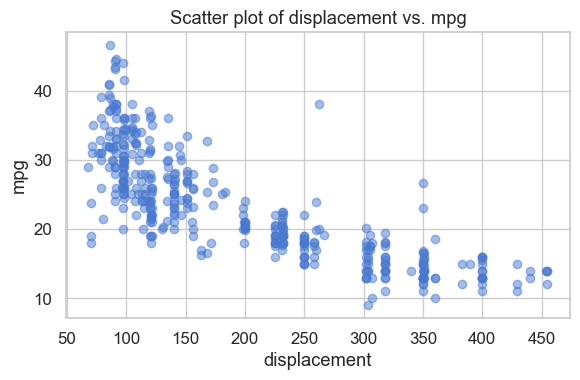

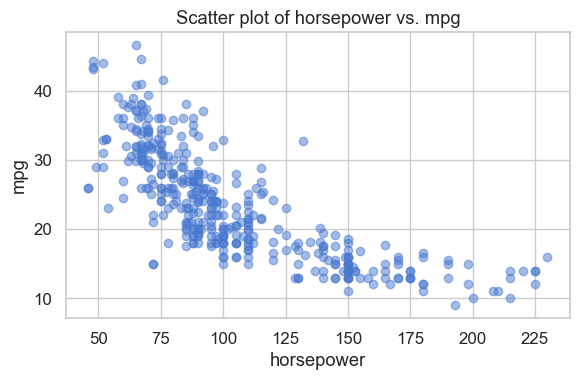

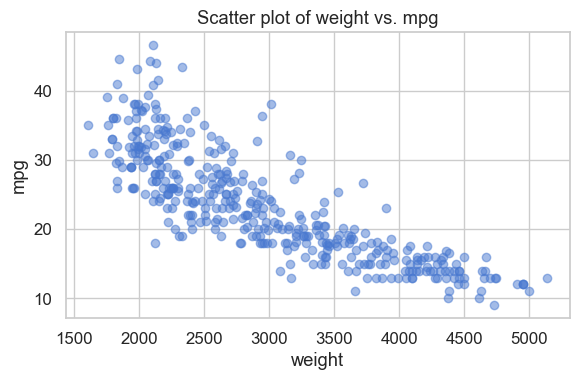

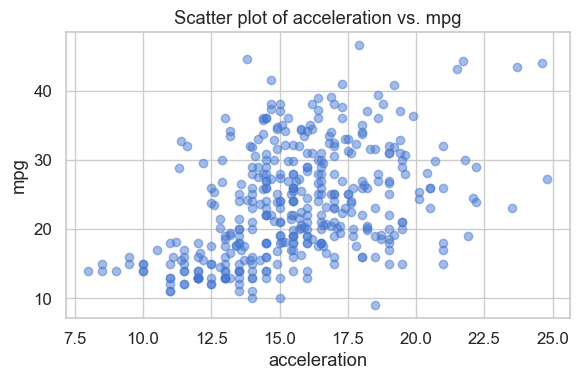

In [85]:
# 6. Examine the Relationship Between Numeric Features and the Target ('mpg')
#    - Numeric columns to consider: 'displacement', 'horsepower', 'weight', 'acceleration'
numeric_cols = [col for col in ["displacement", "horsepower", "weight", "acceleration"] if col in df_encoded.columns]
print("Correlation of numeric features with target (mpg):")
corr_with_target = df_encoded[numeric_cols + ["mpg"]].corr()["mpg"].drop("mpg").sort_values(ascending=False)
print(corr_with_target, "\n")


for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.scatter(df_encoded[col], df_encoded["mpg"], alpha=0.5)
    plt.title(f"Scatter plot of {col} vs. mpg")
    plt.xlabel(col)
    plt.ylabel("mpg")
    plt.tight_layout()
    plt.show()


Fuel efficiency (mpg) generally increases as the vehicle's acceleration time increases (i.e. if the engine is relatively weaker and the vehicle is lighter and smaller).

horsepower (-0.7771): There is a high degree of negative correlation between horsepower and mpg. A vehicle with more horsepower usually means heavier “fuel consumption”, so mpg goes down.

displacement (-0.8042): There is also a very strong negative correlation between engine displacement and mpg. The larger the engine displacement (e.g. 150 in³ instead of 300 in³), the lower the average mpg.

weight (-0.8317): Weight has the strongest negative correlation with mpg. The heavier the vehicle, the higher the fuel consumption and therefore the lower the mpg.

Strongest negative correlation:
weight (-0.8317) → Fuel efficiency (mpg) decreases significantly as vehicle weight increases.

Next strongest negative correlation:
displacement (-0.8042) → The larger the engine displacement, the lower the mpg.

The following negative correlation:
horsepower (-0.7771) → Higher horsepower results in lower car mpg.

The only positive correlation:
acceleration (0.4203) → The higher the acceleration time (i.e. the weaker/lighter the car), the higher the mpg.

If the weight, engine displacement and horsepower of a car are low and the acceleration time is relatively long (small and light engine), then this car will have much higher mpg values (fuel efficiency). Conversely, cars with large displacement, powerful engines, heavy weight and fast acceleration (e.g. performance cars) show much lower mpg values.

Full correlation matrix (first 10 rows & columns):
                    mpg  displacement  horsepower    weight  acceleration  \
mpg            1.000000     -0.804203   -0.777135 -0.831741      0.420289   
displacement  -0.804203      1.000000    0.897288  0.932824     -0.543684   
horsepower    -0.777135      0.897288    1.000000  0.863780     -0.686898   
weight        -0.831741      0.932824    0.863780  1.000000     -0.417457   
acceleration   0.420289     -0.543684   -0.686898 -0.417457      1.000000   
cylinders_4    0.758259     -0.823494   -0.691628 -0.802992      0.384747   
cylinders_5    0.043005     -0.040525   -0.049636  0.013695      0.096990   
cylinders_6   -0.233815      0.122760   -0.036971  0.139308      0.130516   
cylinders_8   -0.647308      0.860098    0.836503  0.799446     -0.560540   
model_year_71 -0.079804      0.043122    0.017051  0.008133     -0.042472   

               cylinders_4  cylinders_5  cylinders_6  cylinders_8  \
mpg               0.758259     0

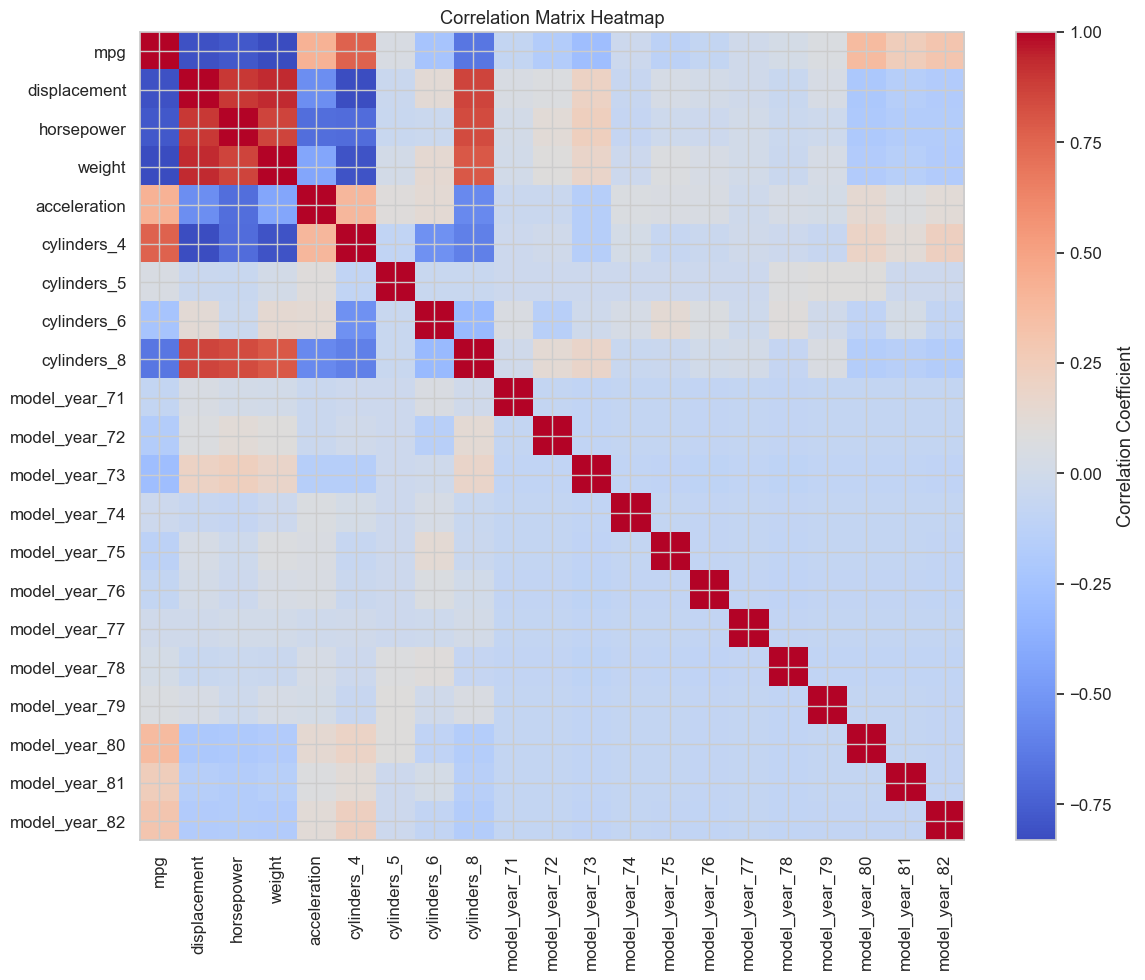

In [87]:
# 7. Display the Full Correlation Matrix and Visualize as a Heatmap
corr_matrix = df_encoded.corr()
print("Full correlation matrix (first 10 rows & columns):")
print(corr_matrix.iloc[:10, :10], "\n")

plt.figure(figsize=(12, 10))
plt.imshow(corr_matrix, cmap="coolwarm", interpolation="none", aspect="auto")
plt.colorbar(label="Correlation Coefficient")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()


The high red squares between weight, displacement, horsepower tell us that there is a strong positive correlation between these three characteristics;
at the same time the blue squares between these three and mpg tell us that they correlate negatively, with a similar magnitude (about -0.8).

In terms of acceleration, the heatmap shows a light red color with mpg in the upper left corner and a blue color between acceleration and weight/horsepower/displacement above. In other words, “as acceleration increases, mpg increases, but as acceleration decreases, cars with bigger engines/heavier cars usually come out.

In [89]:
# 8. Prepare Data for Modeling (Feature Matrix X and Target Vector y)
#    - Drop 'mpg' and 'car_name' (if it exists) from features
X = df_encoded.drop(["mpg", "car_name"], axis=1, errors="ignore")
y = df_encoded["mpg"]

# 8a. Split into Training and Testing Sets (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size:  {X_test.shape[0]} samples\n")


Training set size: 318 samples
Testing set size:  80 samples



In [93]:
# 9. Build and Evaluate a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred_lr = lin_reg.predict(X_train)
y_test_pred_lr = lin_reg.predict(X_test)

r2_train_lr = r2_score(y_train, y_train_pred_lr)
mae_train_lr = mean_absolute_error(y_train, y_train_pred_lr)
mse_train_lr = mean_squared_error(y_train, y_train_pred_lr)
rmse_train_lr = np.sqrt(mse_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_pred_lr)
mse_test_lr = mean_squared_error(y_test, y_test_pred_lr)
rmse_test_lr = np.sqrt(mse_test_lr)

print("=== Linear Regression Performance ===")
print(f" TRAIN R²: {r2_train_lr:.4f} | MAE: {mae_train_lr:.4f} | MSE: {mse_train_lr:.4f} | RMSE: {rmse_train_lr:.4f}")
print(f" TEST  R²: {r2_test_lr:.4f} | MAE: {mae_test_lr:.4f} | MSE: {mse_test_lr:.4f} | RMSE: {rmse_test_lr:.4f}")

# Check for overfitting (difference between train R² and test R² > 0.05)
if (r2_train_lr - r2_test_lr) > 0.05:
    print("Warning: The linear regression model may be overfitting.")
else:
    print("Linear regression does not show significant overfitting.")

# 10. Build and Evaluate a Random Forest Regression Model (Alternative)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_train_pred_rf = rf_reg.predict(X_train)
y_test_pred_rf = rf_reg.predict(X_test)

r2_train_rf = r2_score(y_train, y_train_pred_rf)
mae_train_rf = mean_absolute_error(y_train, y_train_pred_rf)
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
rmse_train_rf = np.sqrt(mse_train_rf)

r2_test_rf = r2_score(y_test, y_test_pred_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
rmse_test_rf = np.sqrt(mse_test_rf)

print("\n=== Random Forest Regression Performance ===")
print(f" TRAIN R²: {r2_train_rf:.4f} | MAE: {mae_train_rf:.4f} | MSE: {mse_train_rf:.4f} | RMSE: {rmse_train_rf:.4f}")
print(f" TEST  R²: {r2_test_rf:.4f} | MAE: {mae_test_rf:.4f} | MSE: {mse_test_rf:.4f} | RMSE: {rmse_test_rf:.4f}")

print("\n=== Comparison on TEST DATA ===")
print(f" Linear Regression -> R²: {r2_test_lr:.4f}, RMSE: {rmse_test_lr:.4f}")
print(f" Random Forest     -> R²: {r2_test_rf:.4f}, RMSE: {rmse_test_rf:.4f}")

if r2_test_rf > r2_test_lr:
    print("Random Forest outperforms Linear Regression on the test set.")
else:
    print("Linear Regression outperforms Random Forest on the test set.")

=== Linear Regression Performance ===
 TRAIN R²: 0.8636 | MAE: 2.1709 | MSE: 8.5519 | RMSE: 2.9244
 TEST  R²: 0.8579 | MAE: 2.2435 | MSE: 7.6418 | RMSE: 2.7644
Linear regression does not show significant overfitting.

=== Random Forest Regression Performance ===
 TRAIN R²: 0.9746 | MAE: 0.8632 | MSE: 1.5897 | RMSE: 1.2608
 TEST  R²: 0.8354 | MAE: 2.1457 | MSE: 8.8499 | RMSE: 2.9749

=== Comparison on TEST DATA ===
 Linear Regression -> R²: 0.8579, RMSE: 2.7644
 Random Forest     -> R²: 0.8354, RMSE: 2.9749
Linear Regression outperforms Random Forest on the test set.


Train Performance (Random Forest):

R² ≈ 0.9746 (very high; the model almost memorized the training set).

MAE ≈ 0.8632 mpg, RMSE ≈ 1.2608 mpg (even very low error of ±1.26 mpg).

Such low error and high R² are indicative of overfitting: The model found the training data very well, capturing almost every point exactly.

Test Set (Test) Performance (Random Forest):

R² ≈ 0.8354 (lower, lagging behind Linear Regression's 0.8579).

MAE ≈ 2.1457 mpg, RMSE ≈ 2.9749 mpg (approximately ±2.97 mpg).

These values in the test lag behind Linear Regression's test RMSE = 2.7644 mpg and R² = 0.8579. So Random Forest did slightly worse on “test data it never saw”.

Model Comparison (On the Test Set):

Linear Regression is better at testing:

R²: 0.8579 (LR) > 0.8354 (RF)

RMSE: 2.7644 (LR) < 2.9749 (RF)

That's why the message “Linear Regression outperforms Random Forest on the test set.” appeared at the end of the code.

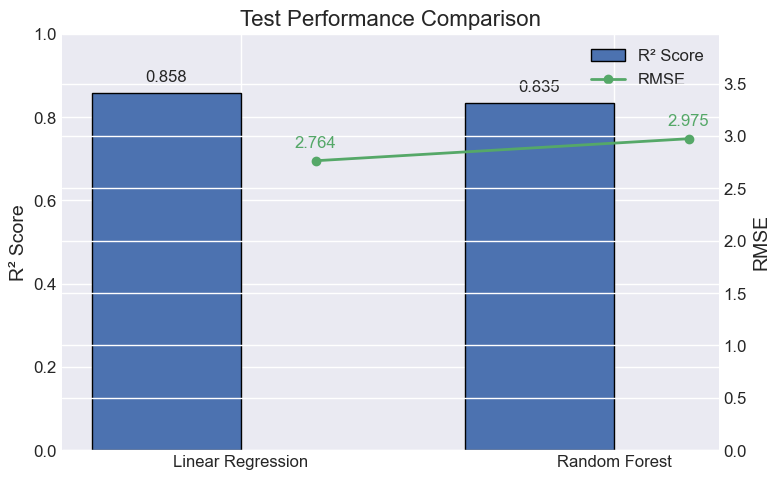

In [101]:
import matplotlib.pyplot as plt
import numpy as np

# Define the performance metrics
models = ['Linear Regression', 'Random Forest']
r2_scores = [0.8579, 0.8354]   # Test R² values
rmse_scores = [2.7644, 2.9749] # Test RMSE values

x = np.arange(len(models))
width = 0.4

# Use seaborn style for a more polished look
plt.style.use('seaborn-v0_8-darkgrid')

fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar plot for R² on primary y-axis
bars = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='#4C72B0', edgecolor='black')
ax1.set_ylabel('R² Score', fontsize=14)
ax1.set_ylim(0, 1)
ax1.set_title('Test Performance Comparison', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=0, fontsize=12)

# Add data labels on bars for R²
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height + 0.02, f'{height:.3f}', ha='center', va='bottom', fontsize=12)

# Secondary axis for RMSE
ax2 = ax1.twinx()
ax2.plot(x + width/2, rmse_scores, label='RMSE', color='#55A868', marker='o', linewidth=2)
ax2.set_ylabel('RMSE', fontsize=14)
ax2.set_ylim(0, max(rmse_scores) + 1)

# Add data labels for RMSE points
for i, val in enumerate(rmse_scores):
    ax2.text(x[i] + width/2, val + 0.1, f'{val:.3f}', ha='center', va='bottom', fontsize=12, color='#55A868')

# Draw a legend
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(handles1 + handles2, labels1 + labels2, loc='upper right', fontsize=12)

plt.tight_layout()
plt.show()


The graph above shows both the R² value (blue bars) and the RMSE value (green dot-line) on a single pair of axes (two different y-axes). Thus

Blue bars: R² score of each model in the test set (y-axis on the left).

Linear Regression: R² ≈ 0.8579

Random Forest: R² ≈ 0.8354

Green Dot-Line: RMSE error of each model on the test set (y-axis on the right).

Linear Regression: RMSE ≈ 2.7644

Random Forest: RMSE ≈ 2.9749

Therefore in the same graph:

The y-axis on the left measures “R² Score” (between 0-1).

The y-axis on the right measures “RMSE” (e.g. between 0-3.5).